In [88]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
import matplotlib.pyplot as plt
import seaborn as sns

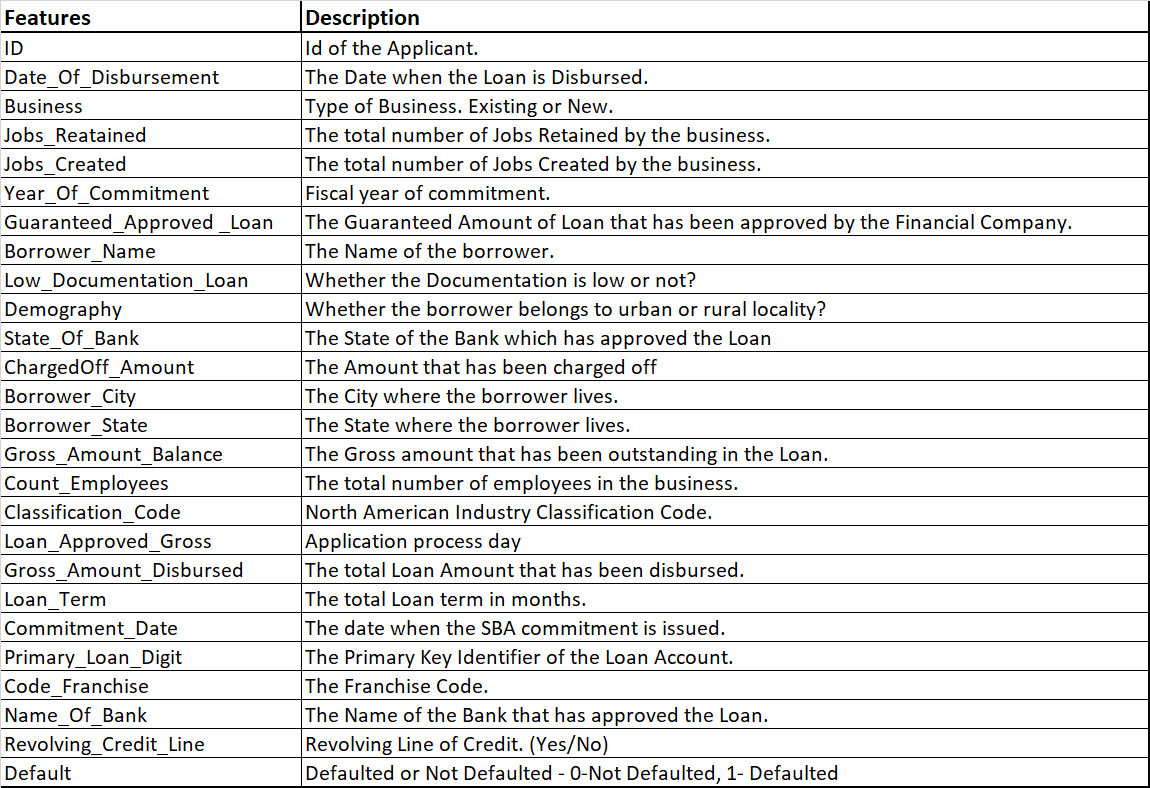

In [89]:
train=pd.read_csv('/content/drive/MyDrive/training_data.csv')
test=pd.read_csv('/content/drive/MyDrive/testing_data.csv')

In [ ]:
train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [ ]:
wilson=pd.concat([train,test],ignore_index=True)

In [ ]:
wilson.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0.0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1.0
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0.0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0.0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1.0


In [ ]:
train.shape,test.shape,wilson.shape

((105000, 26), (45000, 25), (150000, 26))

In [ ]:
wilson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  int64  
 1   Date_Of_Disbursement       149657 non-null  object 
 2   Business                   149979 non-null  object 
 3   Jobs_Reatained             150000 non-null  int64  
 4   Jobs_Created               150000 non-null  int64  
 5   Year_Of_Commitment         150000 non-null  object 
 6   Guaranteed_Approved _Loan  150000 non-null  object 
 7   Borrower_Name              149995 non-null  object 
 8   Low_Documentation_Loan     149500 non-null  object 
 9   Demography                 150000 non-null  object 
 10  State_Of_Bank              150000 non-null  object 
 11  ChargedOff_Amount          150000 non-null  object 
 12  Borrower_City              150000 non-null  object 
 13  Borrower_State             14

In [ ]:
df=wilson.copy()

In [ ]:
''.join(list('45890tyif')[2:])

'890tyif'

In [ ]:
df.columns=[i.strip() for i in df.columns]

In [ ]:
'ChargedOff_Amount '.strip()

'ChargedOff_Amount'

In [ ]:
df['Guaranteed_Approved _Loan']=df['Guaranteed_Approved _Loan'].apply(lambda x:float(''.join(list(x)[3:])))
df['ChargedOff_Amount']=df['ChargedOff_Amount'].apply(lambda x:float(''.join(list(x)[3:])))
df['Gross_Amount_Balance']=df['Gross_Amount_Balance'].apply(lambda x:float(''.join(list(x)[3:])))
df['Loan_Approved_Gross']=df['Loan_Approved_Gross'].apply(lambda x:float(''.join(list(x)[3:])))
df['Gross_Amount_Disbursed']=df['Gross_Amount_Disbursed'].apply(lambda x:float(''.join(list(x)[3:])))

In [ ]:
df.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,0.00,Mumbai,Maharashtra,0.0,38,0,40640000.0,40640000.00,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0.0
1,1,30-Apr-06,New,0,6,2006,32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,38283367.68,Delhi,Delhi,0.0,6,451120,43647360.0,43647360.00,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1.0
2,2,30-Jun-04,Existing,4,0,2004,1422400.0,TELECOMMQC L L C,No,Urban,AS,0.00,Bengaluru,Karnataka,0.0,4,541618,2844800.0,5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0.0
3,3,31-Jan-06,New,9,1,2006,2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,0.00,Ahmedabad,Gujarat,0.0,7,811112,4064000.0,4064000.00,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0.0
4,4,31-Dec-04,Existing,4,0,2005,22981920.0,SUNBEAM DELI,No,Urban,TR,22862519.68,Hyderabad,Telangana,0.0,4,722211,30642560.0,30642560.00,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  int64  
 1   Date_Of_Disbursement       149657 non-null  object 
 2   Business                   149979 non-null  object 
 3   Jobs_Reatained             150000 non-null  int64  
 4   Jobs_Created               150000 non-null  int64  
 5   Year_Of_Commitment         150000 non-null  object 
 6   Guaranteed_Approved _Loan  150000 non-null  float64
 7   Borrower_Name              149995 non-null  object 
 8   Low_Documentation_Loan     149500 non-null  object 
 9   Demography                 150000 non-null  object 
 10  State_Of_Bank              150000 non-null  object 
 11  ChargedOff_Amount          150000 non-null  float64
 12  Borrower_City              150000 non-null  object 
 13  Borrower_State             14

In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts().head(10))

31-Jul-95    1567
30-Apr-95    1540
31-Jan-95    1459
31-Oct-94    1344
31-Mar-06    1320
30-Apr-07    1275
30-Apr-96    1247
30-Apr-06    1243
31-Aug-07    1241
31-May-06    1239
Name: Date_Of_Disbursement, dtype: int64
Existing    107153
New          42667
0              159
Name: Business, dtype: int64
2007    11044
2006    10943
2005    10787
2004     8869
2003     7290
2008     6043
2002     5500
1995     5325
2001     4727
1996     4724
Name: Year_Of_Commitment, dtype: int64
SUBWAY                   212
QUIZNO'S SUBS             69
COLD STONE CREAMERY       60
QUIZNO'S                  59
DAIRY QUEEN               58
DOMINO'S PIZZA            58
MAIL BOXES ETC            53
MATCO TOOLS               50
QUIZNO'S CLASSIC SUBS     43
CURVES FOR WOMEN          43
Name: Borrower_Name, dtype: int64
No     131611
Yes     17292
0         237
S         138
C         120
A          93
R           9
Name: Low_Documentation_Loan, dtype: int64
Urban        82184
Undefined    50119
Rural      

In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].unique())

['31-Jul-91' '30-Apr-06' '30-Jun-04' ... '24-Sep-90' '18-Apr-12'
 '9-Aug-02']
['Existing' 'New' '0' nan]
['1991' '2006' '2004' '2005' '2001' '2007' '1996' '2002' '1997' '2009'
 '2008' '2010' '1993' '1994' '2011' '1999' '2003' '1995' '2013' '2000'
 '1998' '1990' '1989' '1988' '1992' '2012' '1986' '1985' '1984' '1983'
 '1987' '1982' '1977' '1980' '1979' '1970' '1978' '1981' '1972' '1973'
 '2014' '1971' '1976' '1974' '1969' '1976A' '1975' 2010 2006 2005 2004
 2003 2000 2001 2011 1993 2002 2008 2007 1994 1999 1998 1996 2014 1989
 1997 1995 1990 2013 1982 1983 2012 1992 2009 1985 1987 1991 1984 1978
 1988 1981 1986 1980 1979 1972 1974 1973 1977 1975 1971 1976 '1966']
['STANDARD PARTS CORPORATION' 'FRANK & KERI AMESTOY' 'TELECOMMQC L L C'
 ... 'ARTHUR J DEBAISE M.D., P.A.' 'CHO & SONS CORP'
 'Hanft Family Chiropractic, Inc']
['No' 'Yes' nan 'S' '0' 'A' 'C' 'R']
['Undefined' 'Urban' 'Rural']
['AP' 'TR' 'AS' 'BR' 'CG' 'AR' 'GJ' 'HR' 'HP' 'JK' 'JH' 'KA' 'KL' 'MP'
 'MH' 'LD' 'ML' 'MZ' 'NL' 'OR' 

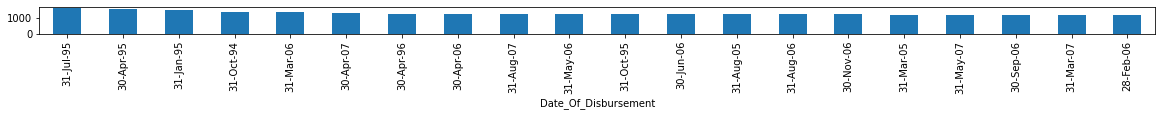

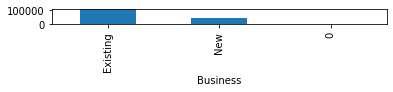

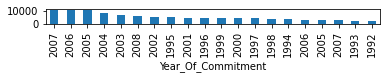

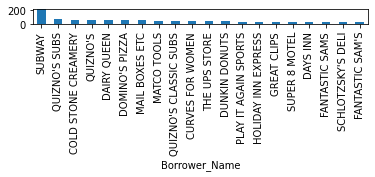

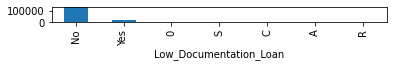

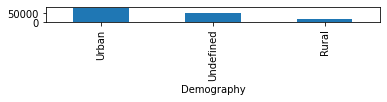

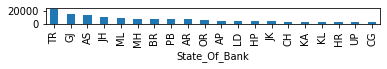

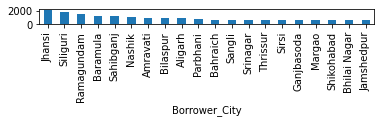

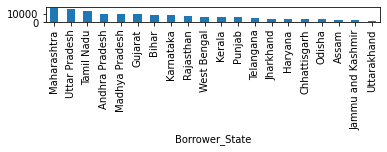

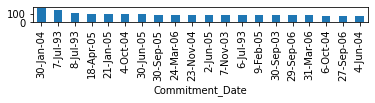

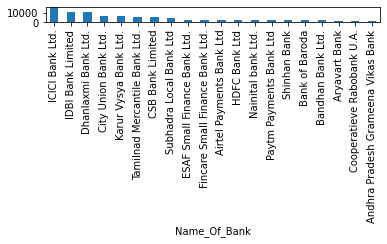

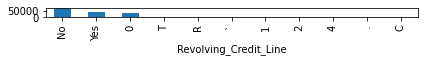

In [ ]:
c=1
plt.figure(figsize=[20,7])
for i in df.select_dtypes(include='object').columns:
  plt.subplot(12,1,c)
  df[i].value_counts().head(20).plot(kind='bar')
  plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()


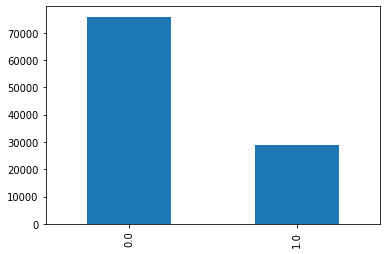

In [ ]:
df['Default'].value_counts().plot(kind='bar')

In [ ]:
df['Default'].value_counts()

0.0    75896
1.0    29104
Name: Default, dtype: int64

In [ ]:
wilson.select_dtypes(include='object').columns

Index(['Date_Of_Disbursement', 'Business', 'Year_Of_Commitment ',
       'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan',
       'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Commitment_Date', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

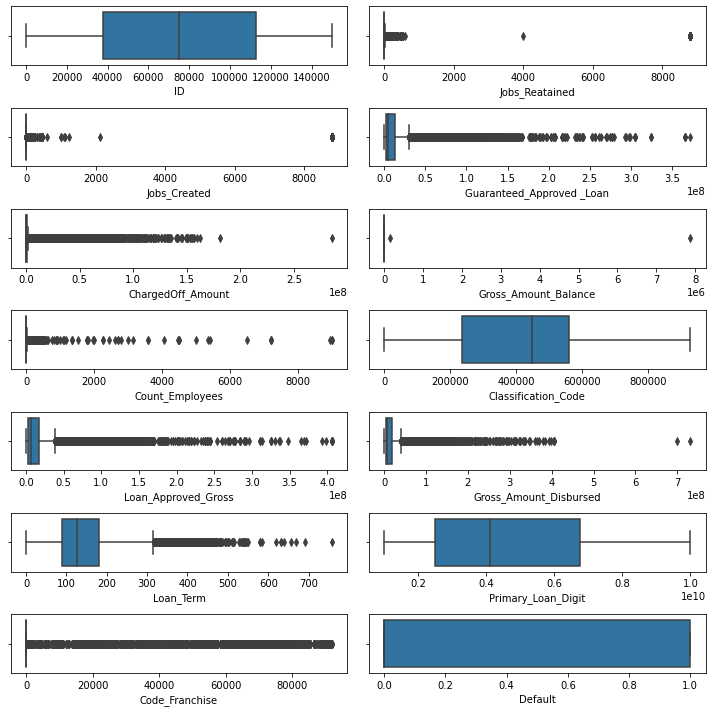

In [ ]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(exclude='object').columns:
  plt.subplot(7,2,c)
  sns.boxplot(df[i])
  # plt.xlabel(i)
  c=c+1
plt.tight_layout()
plt.show()


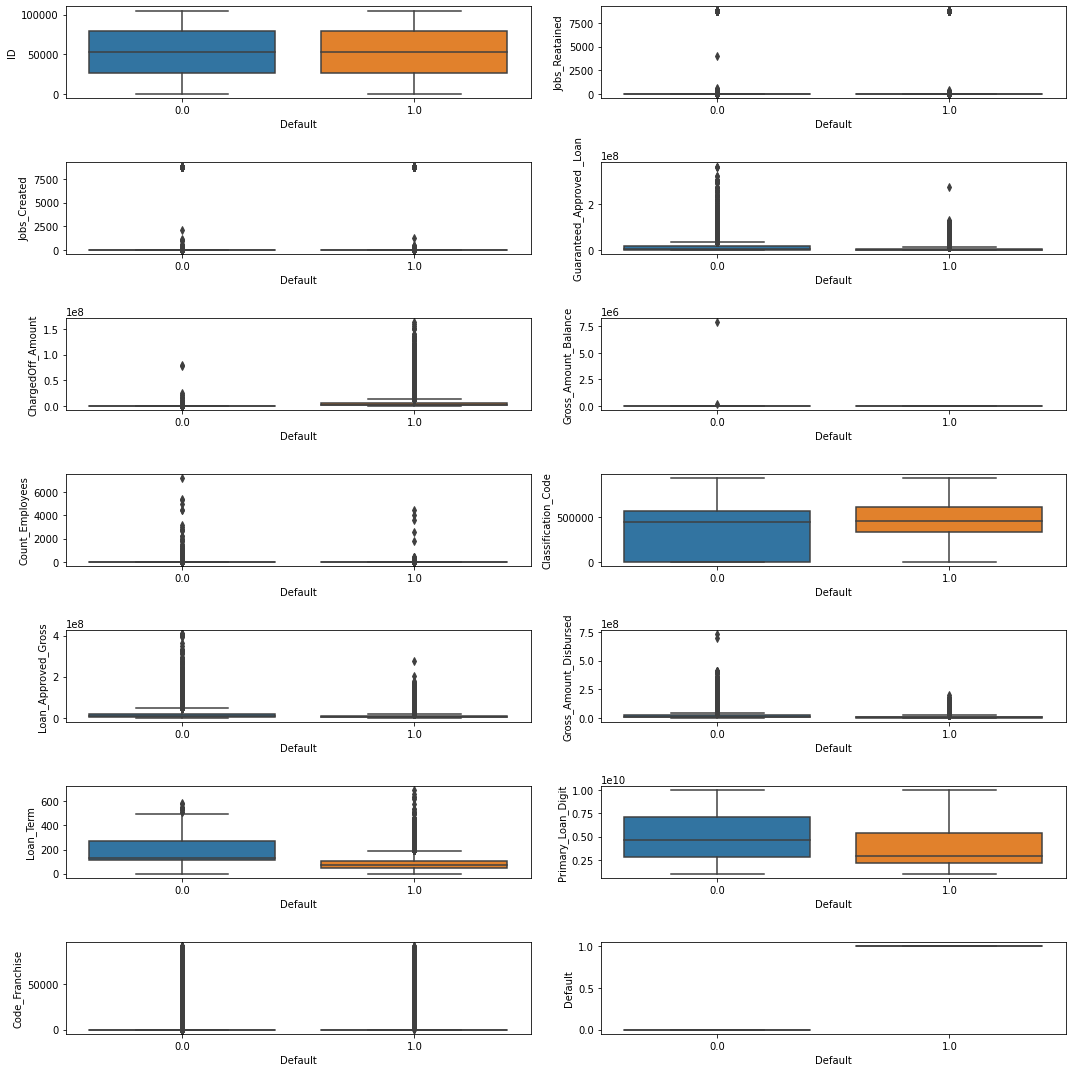

In [ ]:
c=1
plt.figure(figsize=[15,15])
for i in df.select_dtypes(exclude='object').columns:
  plt.subplot(7,2,c)
  sns.boxplot(df['Default'],df[i])
  # plt.xlabel(i)
  c=c+1
plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes(include='object').columns

Index(['Date_Of_Disbursement', 'Business', 'Year_Of_Commitment',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'Borrower_City', 'Borrower_State', 'Commitment_Date',
       'Name_Of_Bank', 'Revolving_Credit_Line'],
      dtype='object')

In [ ]:
df

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,0.00,Mumbai,Maharashtra,0.0,38,0,40640000.0,40640000.00,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0.0
1,1,30-Apr-06,New,0,6,2006,32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,38283367.68,Delhi,Delhi,0.0,6,451120,43647360.0,43647360.00,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1.0
2,2,30-Jun-04,Existing,4,0,2004,1422400.0,TELECOMMQC L L C,No,Urban,AS,0.00,Bengaluru,Karnataka,0.0,4,541618,2844800.0,5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0.0
3,3,31-Jan-06,New,9,1,2006,2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,0.00,Ahmedabad,Gujarat,0.0,7,811112,4064000.0,4064000.00,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0.0
4,4,31-Dec-04,Existing,4,0,2005,22981920.0,SUNBEAM DELI,No,Urban,TR,22862519.68,Hyderabad,Telangana,0.0,4,722211,30642560.0,30642560.00,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,30-Nov-05,Existing,3,1,2005,1625600.0,ULTIMATE COMPUTERS,No,Urban,ML,1838309.76,Bhuj,Gujarat,0.0,3,423690,3251200.0,2291852.16,81,29-Sep-05,9135674006,1,Saurashtra Gramin Bank,Yes,NaN
149996,149996,31-Jul-02,Existing,12,0,2002,29657040.0,"MARK A. HENKE, D>M.D., P.C.",No,Urban,KL,0.00,Rajnandgaon,Chhattisgarh,0.0,12,621210,39542720.0,36292170.24,180,27-Jun-02,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN,NaN
149997,149997,13-Aug-08,Existing,0,15,2008,60878720.0,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,UP,0.00,Sankeshwara,Karnataka,0.0,4,621111,60878720.0,60878720.00,360,15-Apr-08,3225006003,1,Aryavart Bank,NaN,NaN
149998,149998,28-Feb-03,Existing,2,0,2003,2032000.0,CHO & SONS CORP,No,Urban,PB,0.00,Kakinada,Andhra Pradesh,0.0,2,445120,4064000.0,4064000.00,90,24-Jan-03,6047584010,1,Au Small Finance Bank Ltd.,NaN,NaN


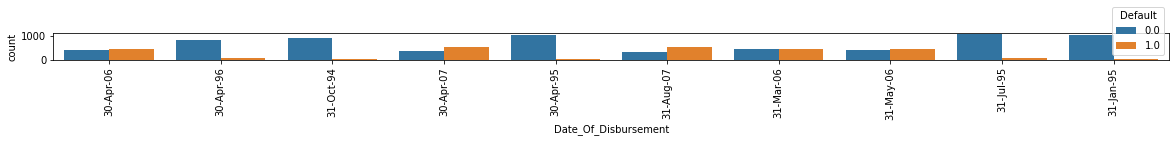

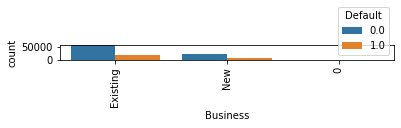

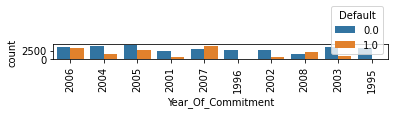

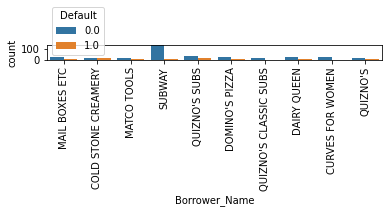

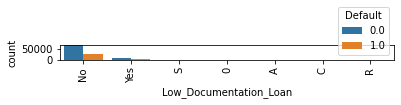

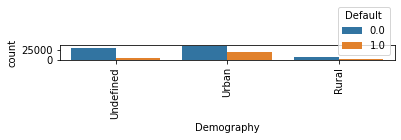

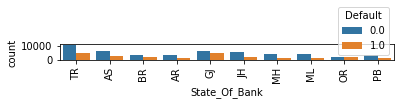

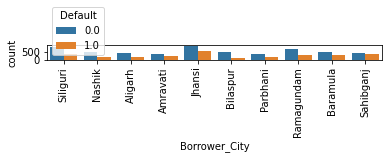

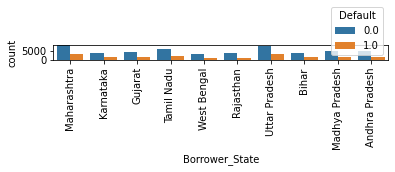

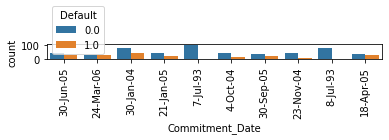

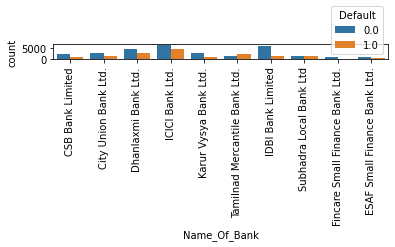

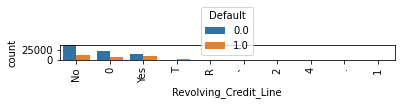

In [ ]:

c=1
plt.figure(figsize=[20,7])
for i in df.select_dtypes(include='object').columns:
  plt.subplot(12,1,c)
  # df[i].value_counts().head(20).plot(kind='bar')
  a=df[i].value_counts().head(10).index
  df1=df[df[i].isin(a)]
  # pd.crosstab(df1['Default'],df1[i]).plot(kind='bar')
  sns.countplot(df1[i],hue=df1['Default'])
  plt.xticks(rotation=90)
  # plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()

In [ ]:
wilson.select_dtypes(include='object').columns

Index(['Date_Of_Disbursement', 'Business', 'Year_Of_Commitment ',
       'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan',
       'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Commitment_Date', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

**Let Clean the data**

* Revolving_Credit_Line

In [ ]:
df['Revolving_Credit_Line'].unique()

array(['No', '0', 'Yes', 'T', nan, 'R', '`', '2', '4', '.', '1', 'C'],
      dtype=object)

In [ ]:
# Revolving_Credit_Line
a=[i for i in df['Revolving_Credit_Line'].unique()]
a.remove('No')
a.remove('Yes')
for i in a:
  for j in df.select_dtypes(include='object').columns:
    print(df[df['Revolving_Credit_Line']==i][j].value_counts())
    print(i,j,sep='/')
  print()

31-Oct-04    389
31-Dec-03    369
30-Jun-04    324
31-Oct-03    321
31-Jan-04    321
            ... 
2-Apr-08       1
18-Jul-05      1
18-Jan-02      1
24-Nov-98      1
6-Oct-00       1
Name: Date_Of_Disbursement, Length: 380, dtype: int64
0/Date_Of_Disbursement
Existing    20105
New          9499
0               8
Name: Business, dtype: int64
0/Business
2004    2610
2005    2212
2003    2102
2002    1839
1999    1723
2000    1716
2001    1632
2006    1569
1998    1337
2004    1176
2005    1028
2007    1015
1997     957
2003     942
2002     859
2000     789
2001     752
1999     749
1996     715
2006     660
2008     658
1998     623
2007     446
1997     434
2008     326
1996     326
1995     190
2009      96
1995      83
2009      48
Name: Year_Of_Commitment, dtype: int64
0/Year_Of_Commitment
SUBWAY                            103
QUIZNO'S SUBS                      43
MAIL BOXES ETC                     31
QUIZNO'S                           30
MATCO TOOLS                        27
  

In [ ]:
# the R in Revolving_Credit_Line is there only for existing buissness,so replacing R with mode of Revolving_Credit_Line of existing buissness 
df[df['Business']=='Existing']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['R'],['No'],inplace=True)

In [ ]:
# the T in Revolving_Credit_Line is there only No for label of low documentation ,so replacing T with mode of Revolving_Credit_Line of No label of low documentation. 
df[df['Low_Documentation_Loan']=='No']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['T'],['No'],inplace=True)

In [ ]:
# the '`' in Revolving_Credit_Line is there only for Yes label of low documentation ,so replacing T with mode of Revolving_Credit_Line of Yes label of low documentation. 
df[df['Low_Documentation_Loan']=='Yes']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['`'],['No'],inplace=True)

In [ ]:
# the '2' in Revolving_Credit_Line is there only for urban demography ,so replacing 2 with mode of Revolving_Credit_Line of urban demography
df[df['Demography']=='Urban']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['2'],['Yes'],inplace=True)

In [ ]:
# the '4' in Revolving_Credit_Line is there only for Jhansi Borrower_City ,so replacing 4 with mode of Revolving_Credit_Line of jhansi Borrower_City
df[df['Borrower_City']=='Jhansi']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['4'],['No'],inplace=True)

In [ ]:
# the '.' in Revolving_Credit_Line is there only for Kolar Borrower_City ,so replacing '.' with mode of Revolving_Credit_Line of Kolar Borrower_City
df[df['Borrower_City']=='Kolar']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['.'],['No'],inplace=True)

In [ ]:
# the 'C' in Revolving_Credit_Line is there only  for Panvel Borrower_City ,so replacing 'C' with mode of Revolving_Credit_Line of Panvel Borrower_City
df[df['Borrower_City']=='Panvel']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['C'],['No'],inplace=True)

In [ ]:
# the '1' in Revolving_Credit_Line is there only TR state_of_bank ,so replacing '1' with mode of Revolving_Credit_Line of Tr state of bank
df[df['State_Of_Bank']=='TR']['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['1'],['No'],inplace=True)

In [ ]:
# And replacing 0 with the mode of Revolving_Credit_Line
df['Revolving_Credit_Line'].mode()
df['Revolving_Credit_Line'].replace(['0'],['No'],inplace=True)

In [ ]:
df['Revolving_Credit_Line'].unique()

array(['No', 'Yes', nan], dtype=object)

* Business

In [ ]:
df['Business'].value_counts()

Existing    107153
New          42667
0              159
Name: Business, dtype: int64

In [ ]:
for j in df.select_dtypes(include='object').columns:
    print(df[df['Business']=='0'][j].value_counts())


30-Apr-95    4
31-Aug-02    4
31-May-03    3
30-Apr-98    3
30-Nov-04    3
            ..
31-Aug-99    1
13-Nov-96    1
30-Nov-05    1
10-Jan-90    1
31-May-06    1
Name: Date_Of_Disbursement, Length: 113, dtype: int64
0    159
Name: Business, dtype: int64
2003    19
2002    13
2004    12
1998    11
1997     9
1995     8
2000     8
1994     7
1992     6
1993     5
1996     5
1999     5
2003     5
2006     4
1990     4
2004     3
2001     3
1989     3
1984     3
2002     3
1999     2
2001     2
1997     2
1991     2
2005     2
1998     2
2000     1
2007     1
1995     1
1991     1
1988     1
2007     1
1987     1
1996     1
1990     1
1983     1
1966     1
Name: Year_Of_Commitment, dtype: int64
SUBWAY                            2
POINT OF VIEW                     1
PHONEXVILLE BOWLING CENTER,INC    1
Ravi Ramaswami, M.D., P.C.        1
PISMO FLOWERS, LLC                1
                                 ..
DEBORAH JEAN'S                    1
ANGEL CLEANERS, INC.              1
GREAT WHI

In [ ]:
# replacing '0' label of Business with mode of Business
df['Business'].mode()
df['Business'].replace(['0'],['Existing'],inplace=True)

* Demography

In [ ]:
df['Demography'].value_counts()

Urban        82184
Undefined    50119
Rural        17697
Name: Demography, dtype: int64

In [ ]:
for j in df.select_dtypes(include='object').columns:
    print(df[df['Demography']=='Undefined'][j].value_counts())


31-Jul-95    1557
30-Apr-95    1524
31-Jan-95    1445
31-Oct-94    1337
30-Apr-96    1244
             ... 
16-Aug-74       1
28-Feb-88       1
6-Jun-85        1
3-Feb-92        1
24-Sep-90       1
Name: Date_Of_Disbursement, Length: 2979, dtype: int64
Existing    36362
New         13757
Name: Business, dtype: int64
1995    5282
1996    4710
1997    4487
1998    4391
1994    3707
        ... 
1975       2
1971       2
1969       1
1976       1
1966       1
Name: Year_Of_Commitment, Length: 82, dtype: int64
SUBWAY                            47
DAIRY QUEEN                       36
DOMINO'S PIZZA                    28
PLAY IT AGAIN SPORTS              27
WEST TEXAS LEE CO INC             21
                                  ..
CALCO INTERNATIONAL                1
NEW YORK MEAT PRODUCTS, INC.       1
FITNESS HEADQUARTERS               1
ARCO CITY COMPANY                  1
YOURS MINE & OURS- MAYTAG LAUN     1
Name: Borrower_Name, Length: 48087, dtype: int64
No     39428
Yes    10331
0     

Since undefined demography consist of large data values so replacing with mode of demography doesn't make any sense

* Low_Documentation_Loan

In [ ]:
df['Low_Documentation_Loan'].value_counts()

No     131611
Yes     17292
0         237
S         138
C         120
A          93
R           9
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
a=[i for i in df['Low_Documentation_Loan'].unique()]
a.remove('No')
a.remove('Yes')
for i in a:
  for j in df.select_dtypes(include='object').columns:
    print(df[df['Low_Documentation_Loan']==i][j].value_counts())
    print(i,j,sep='/')
  print()

Series([], Name: Date_Of_Disbursement, dtype: int64)
nan/Date_Of_Disbursement
Series([], Name: Business, dtype: int64)
nan/Business
Series([], Name: Year_Of_Commitment, dtype: int64)
nan/Year_Of_Commitment
Series([], Name: Borrower_Name, dtype: int64)
nan/Borrower_Name
Series([], Name: Low_Documentation_Loan, dtype: int64)
nan/Low_Documentation_Loan
Series([], Name: Demography, dtype: int64)
nan/Demography
Series([], Name: State_Of_Bank, dtype: int64)
nan/State_Of_Bank
Series([], Name: Borrower_City, dtype: int64)
nan/Borrower_City
Series([], Name: Borrower_State, dtype: int64)
nan/Borrower_State
Series([], Name: Commitment_Date, dtype: int64)
nan/Commitment_Date
Series([], Name: Name_Of_Bank, dtype: int64)
nan/Name_Of_Bank
Series([], Name: Revolving_Credit_Line, dtype: int64)
nan/Revolving_Credit_Line

30-Jun-09    12
30-Sep-08     7
31-Jan-08     6
30-Apr-09     6
30-Nov-07     5
             ..
1-Apr-10      1
4-Apr-11      1
28-Jan-10     1
4-Jan-11      1
2-Nov-10      1
Name: Dat

In [ ]:
# did n't got any label for Low_Documentation_Loan'labels, Therefore replacing with mode of Low_Documentation_Loan
df['Low_Documentation_Loan'].mode()
a=[i for i in df['Low_Documentation_Loan'].unique()]
a.remove('No')
a.remove('Yes')
for i in a:
  df['Low_Documentation_Loan'].replace([i],['No'],inplace=True)

In [ ]:
df['Low_Documentation_Loan'].unique()

array(['No', 'Yes'], dtype=object)

**Missing avlue**

In [ ]:
df.isnull().sum()/len(df)*100

ID                            0.000000
Date_Of_Disbursement          0.228667
Business                      0.014000
Jobs_Reatained                0.000000
Jobs_Created                  0.000000
Year_Of_Commitment            0.000000
Guaranteed_Approved _Loan     0.000000
Borrower_Name                 0.003333
Low_Documentation_Loan        0.000000
Demography                    0.000000
State_Of_Bank                 0.000000
ChargedOff_Amount             0.000000
Borrower_City                 0.000000
Borrower_State                0.032667
Gross_Amount_Balance          0.000000
Count_Employees               0.000000
Classification_Code           0.000000
Loan_Approved_Gross           0.000000
Gross_Amount_Disbursed        0.000000
Loan_Term                     0.000000
Commitment_Date               0.000000
Primary_Loan_Digit            0.000000
Code_Franchise                0.000000
Name_Of_Bank                  0.000000
Revolving_Credit_Line         9.544000
Default                  

In [ ]:
for i in df.drop('Default',axis=1).columns:
  for j in df[df[i].isnull()].index:
    if df[i].dtype=='object':
      for k in df[i].mode():
        df.loc[j,i]=k
    else:
      df.loc[j,i]=df[i].median()

In [ ]:
df.isnull().sum()

ID                               0
Date_Of_Disbursement             0
Business                         0
Jobs_Reatained                   0
Jobs_Created                     0
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    0
Low_Documentation_Loan           0
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                   0
Gross_Amount_Balance             0
Count_Employees                  0
Classification_Code              0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Loan_Term                        0
Commitment_Date                  0
Primary_Loan_Digit               0
Code_Franchise                   0
Name_Of_Bank                     0
Revolving_Credit_Line            0
Default                      45000
dtype: int64

In [ ]:
df.drop('Default',axis=1).columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created', 'Year_Of_Commitment', 'Guaranteed_Approved _Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line'],
      dtype='object')

**Statistical Analysis**

In [ ]:
df.std()

ID                           4.330141e+04
Jobs_Reatained               2.642745e+02
Jobs_Created                 2.641024e+02
Guaranteed_Approved _Loan    1.815161e+07
ChargedOff_Amount            6.674715e+06
Gross_Amount_Balance         2.034086e+04
Count_Employees              7.223916e+01
Classification_Code          2.600724e+05
Loan_Approved_Gross          2.262632e+07
Gross_Amount_Disbursed       2.287478e+07
Loan_Term                    1.163522e+02
Primary_Loan_Digit           2.543848e+09
Code_Franchise               1.271582e+04
Default                      4.476087e-01
dtype: float64

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
for i in df.select_dtypes(exclude='object').columns:
  print(stats.shapiro(df[i]))
  print(i)


ShapiroResult(statistic=0.016574442386627197, pvalue=0.0)
Jobs_Reatained
ShapiroResult(statistic=0.013569176197052002, pvalue=0.0)
Jobs_Created
ShapiroResult(statistic=0.6110087633132935, pvalue=0.0)
Guaranteed_Approved _Loan
ShapiroResult(statistic=0.2642143964767456, pvalue=0.0)
ChargedOff_Amount
ShapiroResult(statistic=0.0001506209373474121, pvalue=0.0)
Gross_Amount_Balance
ShapiroResult(statistic=0.04535841941833496, pvalue=0.0)
Count_Employees
ShapiroResult(statistic=0.9111132025718689, pvalue=0.0)
Classification_Code
ShapiroResult(statistic=0.612508237361908, pvalue=0.0)
Loan_Approved_Gross
ShapiroResult(statistic=0.6156774759292603, pvalue=0.0)
Gross_Amount_Disbursed
ShapiroResult(statistic=0.8381483554840088, pvalue=0.0)
Loan_Term
ShapiroResult(statistic=0.9327623248100281, pvalue=0.0)
Primary_Loan_Digit
ShapiroResult(statistic=0.22060447931289673, pvalue=0.0)
Code_Franchise
ShapiroResult(statistic=nan, pvalue=1.0)
Default


* Non normal distribution

In [ ]:
df1=DataFrame()
c=[]
for i in df.select_dtypes(exclude='object').columns:
  a=df[df['Default']==0][i]
  b=df[df['Default']==1][i]
  tstat,pv=stats.kruskal(a,b)
  c.append(pv)
df1['feat']=[i for i in df.select_dtypes(exclude='object').columns]
df1['pv']=c


In [ ]:
df1

,feat,pv
0,Jobs_Reatained,0.000000e+00
1,Jobs_Created,4.919805e-78
2,Guaranteed_Approved _Loan,0.000000e+00
3,ChargedOff_Amount,0.000000e+00
4,Gross_Amount_Balance,3.811618e-01
5,Count_Employees,0.000000e+00
6,Classification_Code,9.822937e-298
7,Loan_Approved_Gross,0.000000e+00
8,Gross_Amount_Disbursed,0.000000e+00
9,Loan_Term,0.000000e+00


In [ ]:
bst=list(df1[df1['pv']<0.05]['feat'])
bst

['Jobs_Reatained',
 'Jobs_Created',
 'Guaranteed_Approved _Loan',
 'ChargedOff_Amount',
 'Count_Employees',
 'Classification_Code',
 'Loan_Approved_Gross',
 'Gross_Amount_Disbursed',
 'Loan_Term',
 'Primary_Loan_Digit',
 'Code_Franchise',
 'Default']

* Best numerical feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date_Of_Disbursement       150000 non-null  object 
 1   Business                   150000 non-null  object 
 2   Jobs_Reatained             150000 non-null  int64  
 3   Jobs_Created               150000 non-null  int64  
 4   Year_Of_Commitment         150000 non-null  object 
 5   Guaranteed_Approved _Loan  150000 non-null  float64
 6   Borrower_Name              150000 non-null  object 
 7   Low_Documentation_Loan     150000 non-null  object 
 8   Demography                 150000 non-null  object 
 9   State_Of_Bank              150000 non-null  object 
 10  ChargedOff_Amount          150000 non-null  float64
 11  Borrower_City              150000 non-null  object 
 12  Borrower_State             150000 non-null  object 
 13  Gross_Amount_Balance       15

In [ ]:
df.columns

Index(['Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created',
       'Year_Of_Commitment', 'Guaranteed_Approved _Loan', 'Borrower_Name',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [ ]:
df['Commitment_Day']=pd.to_datetime(df['Commitment_Date'],dayfirst=True).dt.day
df['Commitment_month']=pd.to_datetime(df['Commitment_Date'],dayfirst=True).dt.month
df['Commitment_year']=pd.to_datetime(df['Commitment_Date'],dayfirst=True).dt.year

In [ ]:
for i in ['Commitment_Day','Commitment_month','Commitment_year']:
  print(stats.shapiro(df[i]))
  print(i)

ShapiroResult(statistic=0.9541712403297424, pvalue=0.0)
Commitment_Day
ShapiroResult(statistic=0.9464261531829834, pvalue=0.0)
Commitment_month
ShapiroResult(statistic=0.9456145763397217, pvalue=0.0)
Commitment_year


In [ ]:
for i in ['Commitment_Day','Commitment_month','Commitment_year']:
  a=df[df['Default']==0][i]
  b=df[df['Default']==1][i]
  print(stats.kruskal(a,b))
  print(i)


KruskalResult(statistic=0.4438857805994428, pvalue=0.50525289275358)
Commitment_Day
KruskalResult(statistic=0.0008984699774339774, pvalue=0.9760873990329362)
Commitment_month
KruskalResult(statistic=9232.391692672658, pvalue=0.0)
Commitment_year


* 'Commitment_year' year is significant

In [ ]:
df.drop(['Commitment_Day','Commitment_month'],axis=1,inplace=True)

In [ ]:
df['Commitment_year'].value_counts()

2006    14475
2005    13504
2007    13269
2004    12044
2003    10012
2002     7576
1995     6282
1996     6197
2001     6126
1999     5982
2000     5928
2008     5819
1997     5791
1998     5674
1994     5544
1993     3725
2009     3316
1992     3144
2010     2646
1991     2442
1990     2308
1989     2059
2011     1590
2012      806
1988      749
1986      466
1987      429
1984      384
1985      378
1983      333
2013      274
1982      170
1980      139
1981      116
1979       92
1978       78
1977       31
1976       23
2014       22
1973       16
1975       11
1974        9
2070        7
1972        7
2071        4
2069        2
2066        1
Name: Commitment_year, dtype: int64

In [ ]:
df['gap']=pd.to_datetime(df['Date_Of_Disbursement'])-pd.to_datetime(df['Commitment_Date'])

In [ ]:
df['gap']=df['gap'].astype('int')

In [ ]:
a=df[df['Default']==0]['gap']
b=df[df['Default']==1]['gap']
print(stats.kruskal(a,b))

KruskalResult(statistic=6995.3464307395925, pvalue=0.0)


* significant feature

In [ ]:
bst.extend(['gap','Commitment_year'])
bst

['Jobs_Reatained',
 'Jobs_Created',
 'Guaranteed_Approved _Loan',
 'ChargedOff_Amount',
 'Count_Employees',
 'Classification_Code',
 'Loan_Approved_Gross',
 'Gross_Amount_Disbursed',
 'Loan_Term',
 'Primary_Loan_Digit',
 'Code_Franchise',
 'Default',
 'gap',
 'Commitment_year']

In [ ]:
df['Disbursement_Day']=pd.to_datetime(df['Date_Of_Disbursement'],dayfirst=True).dt.day
df['Disbursement_month']=pd.to_datetime(df['Date_Of_Disbursement'],dayfirst=True).dt.month
df['Disbursement_year']=pd.to_datetime(df['Date_Of_Disbursement'],dayfirst=True).dt.year

In [ ]:
for i in ['Disbursement_Day','Disbursement_month','Disbursement_year']:
  a=df[df['Default']==0][i]
  b=df[df['Default']==1][i]
  print(stats.kruskal(a,b))
  print(i)

KruskalResult(statistic=347.0539790092326, pvalue=1.856457701996392e-77)
Disbursement_Day
KruskalResult(statistic=43.65486359552014, pvalue=3.917024549252546e-11)
Disbursement_month
KruskalResult(statistic=8497.751909266553, pvalue=0.0)
Disbursement_year


* all are significant feature

In [ ]:
bst.extend(['Disbursement_Day','Disbursement_month','Disbursement_year'])
bst

['Jobs_Reatained',
 'Jobs_Created',
 'Guaranteed_Approved _Loan',
 'ChargedOff_Amount',
 'Count_Employees',
 'Classification_Code',
 'Loan_Approved_Gross',
 'Gross_Amount_Disbursed',
 'Loan_Term',
 'Primary_Loan_Digit',
 'Code_Franchise',
 'Default',
 'gap',
 'Commitment_year',
 'Disbursement_Day',
 'Disbursement_month',
 'Disbursement_year']

In [ ]:
df.drop(['Date_Of_Disbursement','Commitment_Date'],axis=1,inplace=True)

In [ ]:
df.drop('Year_Of_Commitment',axis=1,inplace=True)

In [ ]:
df.select_dtypes(include='object').columns

Index(['Business', 'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'Borrower_City', 'Borrower_State', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

In [ ]:
df2=DataFrame()
c=[]
for i in df.select_dtypes(include='object').columns:
  a=pd.crosstab(df['Default'],df[i])
  tstat,pv,dn,exp=stats.chi2_contingency(a)
  c.append(pv)
df2['feat']=[i for i in df.select_dtypes(include='object').columns]
df2['pv']=c

In [ ]:
df2[df2['pv']<0.05]

,feat,pv
0,Business,1.869463e-12
1,Borrower_Name,1.988594e-04
2,Low_Documentation_Loan,5.815556e-244
3,Demography,0.000000e+00
4,State_Of_Bank,0.000000e+00
5,Borrower_City,8.398873e-127
6,Borrower_State,4.460675e-14
7,Name_Of_Bank,0.000000e+00
8,Revolving_Credit_Line,0.000000e+00


In [ ]:
bst.extend(list(df2['feat']))
bst

['Jobs_Reatained',
 'Jobs_Created',
 'Guaranteed_Approved _Loan',
 'ChargedOff_Amount',
 'Count_Employees',
 'Classification_Code',
 'Loan_Approved_Gross',
 'Gross_Amount_Disbursed',
 'Loan_Term',
 'Primary_Loan_Digit',
 'Code_Franchise',
 'Default',
 'gap',
 'Commitment_year',
 'Disbursement_Day',
 'Disbursement_month',
 'Disbursement_year',
 'Business',
 'Borrower_Name',
 'Low_Documentation_Loan',
 'Demography',
 'State_Of_Bank',
 'Borrower_City',
 'Borrower_State',
 'Name_Of_Bank',
 'Revolving_Credit_Line']

In [ ]:
df=df[bst]

In [ ]:
df.shape

(150000, 26)

* All categorical feature are significant

**Ferature encoding**

In [94]:
# df['Name_Of_Bank']=df['Name_Of_Bank'].map(dict(df['Name_Of_Bank'].value_counts()/len(df)))
# df['Borrower_State']=df['Borrower_State'].map(dict(df['Borrower_State'].value_counts()/len(df)))
# df['Borrower_City']=df['Borrower_City'].map(dict(df['Borrower_City'].value_counts()/len(df)))
# df['State_Of_Bank']=df['State_Of_Bank'].map(dict(df['State_Of_Bank'].value_counts()/len(df)))
df['Borrower_Name']=df['Borrower_Name'].map(dict(df['Borrower_Name'].value_counts()/len(df)))


In [102]:
df=pd.get_dummies(df,drop_first=True)

In [103]:
df.columns

Index(['Jobs_Reatained', 'Jobs_Created', 'Guaranteed_Approved _Loan',
       'ChargedOff_Amount', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Primary_Loan_Digit', 'Code_Franchise', 'Default', 'gap',
       'Commitment_year', 'Disbursement_Day', 'Disbursement_month',
       'Disbursement_year', 'Borrower_Name', 'State_Of_Bank', 'Borrower_City',
       'Borrower_State', 'Name_Of_Bank', 'Business_New',
       'Low_Documentation_Loan_Yes', 'Demography_Undefined',
       'Demography_Urban', 'Revolving_Credit_Line_Yes'],
      dtype='object')

In [104]:
df.head()

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default,gap,Commitment_year,Disbursement_Day,Disbursement_month,Disbursement_year,Borrower_Name,State_Of_Bank,Borrower_City,Borrower_State,Name_Of_Bank,Business_New,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_Yes
0,0,0,33121600.0,0.00,38,0,40640000.0,40640000.00,126,4419763001,1,0.0,10368000000000000,1991,31,7,1991,0.000007,0.028813,0.001253,0.112233,0.004093,0,0,1,0,0
1,0,6,32735520.0,38283367.68,6,451120,43647360.0,43647360.00,123,1709796003,1,1.0,1728000000000000,2006,30,4,2006,0.000007,0.147700,0.001587,0.003413,0.011067,1,0,0,1,0
2,4,0,1422400.0,0.00,4,541618,2844800.0,5961400.32,90,7464754008,1,0.0,3110400000000000,2004,30,6,2004,0.000007,0.086500,0.000580,0.054520,0.034067,0,0,0,1,1
3,9,1,2032000.0,0.00,7,811112,4064000.0,4064000.00,126,1588745006,0,0.0,3542400000000000,2005,31,1,2006,0.000007,0.052220,0.002180,0.060627,0.043507,1,0,0,1,1
4,4,0,22981920.0,22862519.68,4,722211,30642560.0,30642560.00,104,8037734002,1,1.0,5097600000000000,2004,31,12,2004,0.000007,0.147700,0.000907,0.037127,0.002473,0,0,0,1,0


In [105]:
df.shape

(150000, 27)

**Scaling**

In [106]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scale=mms.fit_transform(df)
scaled_df=DataFrame(scale,columns=df.columns)

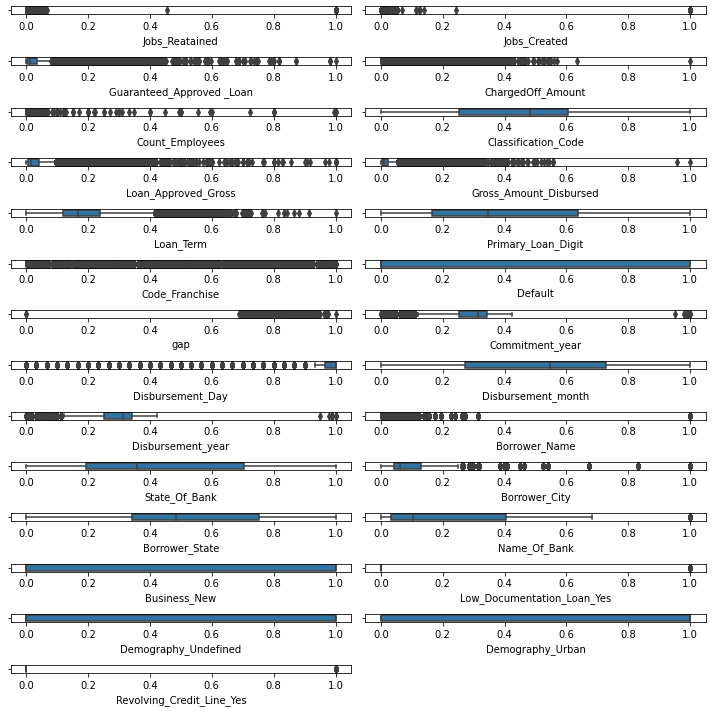

In [109]:
c=1
plt.figure(figsize=[10,10])
for i in scaled_df.columns:
  plt.subplot(14,2,c)
  sns.boxplot(scaled_df[i])
  c=c+1
plt.tight_layout()
plt.show()

**Outliers**

In [111]:
q1=scaled_df.quantile(0.25)
q3=scaled_df.quantile(0.75)
iqr=q3-q1
l=q1-(iqr*1.5)
up=q3-(iqr*1.5)
out=scaled_df.copy()
out[(out<l).any(axis=1)]=l
out[(out>up).any(axis=1)]=up

In [115]:
scaled_df.min()

Jobs_Reatained                0.0
Jobs_Created                  0.0
Guaranteed_Approved _Loan     0.0
ChargedOff_Amount             0.0
Count_Employees               0.0
Classification_Code           0.0
Loan_Approved_Gross           0.0
Gross_Amount_Disbursed        0.0
Loan_Term                     0.0
Primary_Loan_Digit            0.0
Code_Franchise                0.0
Default                       0.0
gap                           0.0
Commitment_year               0.0
Disbursement_Day              0.0
Disbursement_month            0.0
Disbursement_year             0.0
Borrower_Name                 0.0
State_Of_Bank                 0.0
Borrower_City                 0.0
Borrower_State                0.0
Name_Of_Bank                  0.0
Business_New                  0.0
Low_Documentation_Loan_Yes    0.0
Demography_Undefined          0.0
Demography_Urban              0.0
Revolving_Credit_Line_Yes     0.0
dtype: float64

In [114]:
out.min()

Jobs_Reatained               -0.000682
Jobs_Created                 -0.000170
Guaranteed_Approved _Loan    -0.042344
ChargedOff_Amount            -0.003295
Count_Employees              -0.000945
Classification_Code          -0.271864
Loan_Approved_Gross          -0.047159
Gross_Amount_Disbursed       -0.026693
Loan_Term                    -0.059367
Primary_Loan_Digit           -0.546861
Code_Franchise               -0.000016
Default                      -1.500000
gap                           0.838548
Commitment_year               0.116162
Disbursement_Day              0.916667
Disbursement_month           -0.409091
Disbursement_year             0.116162
Borrower_Name                 0.000000
State_Of_Bank                -0.569921
Borrower_City                -0.088744
Borrower_State               -0.269288
Name_Of_Bank                 -0.523286
Business_New                 -1.500000
Low_Documentation_Loan_Yes    0.000000
Demography_Undefined         -1.500000
Demography_Urban         

In [116]:
out.shape

(150000, 27)

In [130]:
out['Default']=df['Default']

**Spliting the data into train and test**

In [131]:
X=out.drop('Default',axis=1)
y=out['Default']
xtrain=X.loc[0:train.shape[0]-1,]
ytrain=y.loc[0:train.shape[0]-1,]
xtest=X.loc[train.shape[0]:,]
train.shape,xtrain.shape,ytrain.shape,xtest.shape,test.shape

((105000, 26), (105000, 26), (105000,), (45000, 26), (45000, 25))

In [132]:
ytrain

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
104995    0.0
104996    0.0
104997    1.0
104998    0.0
104999    0.0
Name: Default, Length: 105000, dtype: float64

In [126]:
xtrain.head()

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,gap,Commitment_year,Disbursement_Day,Disbursement_month,Disbursement_year,Borrower_Name,State_Of_Bank,Borrower_City,Borrower_State,Name_Of_Bank,Business_New,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_Yes
0,-0.000227,-0.000057,-0.011306,-0.001098,-0.000167,0.07898,-0.011652,-0.006228,0.059367,-0.072547,-0.000005,0.840488,0.207071,0.95,0.045455,0.207071,0.0,-0.060678,-0.001868,0.139172,-0.152354,-0.5,0.0,-0.5,-0.5,0.0
1,-0.000227,-0.000057,-0.011306,-0.001098,-0.000167,0.07898,-0.011652,-0.006228,0.059367,-0.072547,-0.000005,0.840488,0.207071,0.95,0.045455,0.207071,0.0,-0.060678,-0.001868,0.139172,-0.152354,-0.5,0.0,-0.5,-0.5,0.0
2,-0.000227,-0.000057,-0.011306,-0.001098,-0.000167,0.07898,-0.011652,-0.006228,0.059367,-0.072547,-0.000005,0.840488,0.207071,0.95,0.045455,0.207071,0.0,-0.060678,-0.001868,0.139172,-0.152354,-0.5,0.0,-0.5,-0.5,0.0
3,-0.000227,-0.000057,-0.011306,-0.001098,-0.000167,0.07898,-0.011652,-0.006228,0.059367,-0.072547,-0.000005,0.840488,0.207071,0.95,0.045455,0.207071,0.0,-0.060678,-0.001868,0.139172,-0.152354,-0.5,0.0,-0.5,-0.5,0.0
4,-0.000227,-0.000057,-0.011306,-0.001098,-0.000167,0.07898,-0.011652,-0.006228,0.059367,-0.072547,-0.000005,0.840488,0.207071,0.95,0.045455,0.207071,0.0,-0.060678,-0.001868,0.139172,-0.152354,-0.5,0.0,-0.5,-0.5,0.0


In [119]:
ytrain.value_counts()

-0.5    85955
-1.5    19045
Name: Default, dtype: int64

In [133]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=10)
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

**MODEL MAKING**

In [125]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Jobs_Reatained              150000 non-null  float64
 1   Jobs_Created                150000 non-null  float64
 2   Guaranteed_Approved _Loan   150000 non-null  float64
 3   ChargedOff_Amount           150000 non-null  float64
 4   Count_Employees             150000 non-null  float64
 5   Classification_Code         150000 non-null  float64
 6   Loan_Approved_Gross         150000 non-null  float64
 7   Gross_Amount_Disbursed      150000 non-null  float64
 8   Loan_Term                   150000 non-null  float64
 9   Primary_Loan_Digit          150000 non-null  float64
 10  Code_Franchise              150000 non-null  float64
 11  Default                     150000 non-null  float64
 12  gap                         150000 non-null  float64
 13  Commitment_yea

In [123]:
from sklearn.metrics import classification_report


In [134]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
bmod=lr.fit(xtrain,ytrain)
print(classification_report(ytrain,bmod.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.62      0.20      0.30     75896
         1.0       0.52      0.87      0.65     75896

    accuracy                           0.54    151792
   macro avg       0.57      0.54      0.48    151792
weighted avg       0.57      0.54      0.48    151792



In [138]:
sol=DataFrame({'ID':test['ID'],'Default':bmod.predict(xtest)})
sol.to_csv('wilbm.csv',index=False)

In [139]:
sol['Default'].value_counts()

1.0    37001
0.0     7999
Name: Default, dtype: int64

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dtmod=dt.fit(xtrain,ytrain)
print(classification_report(ytrain,dtmod.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.62      0.20      0.30     75896
         1.0       0.52      0.87      0.65     75896

    accuracy                           0.54    151792
   macro avg       0.57      0.54      0.48    151792
weighted avg       0.57      0.54      0.48    151792



In [143]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnbmod=mnb.fit(abs(xtrain),ytrain)
print(classification_report(ytrain,mnbmod.predict(abs(xtrain))))

              precision    recall  f1-score   support

         0.0       0.62      0.20      0.30     75896
         1.0       0.52      0.87      0.65     75896

    accuracy                           0.54    151792
   macro avg       0.57      0.54      0.48    151792
weighted avg       0.57      0.54      0.48    151792



In [145]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
mlpmod=mlp.fit(xtrain,ytrain.values.ravel())
print(classification_report(ytrain,mlp.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.62      0.20      0.30     75896
         1.0       0.52      0.87      0.65     75896

    accuracy                           0.54    151792
   macro avg       0.57      0.54      0.48    151792
weighted avg       0.57      0.54      0.48    151792



In [154]:
round(df['gap']/365)

0         2.840548e+13
1         4.734247e+12
2         8.521644e+12
3         9.705205e+12
4         1.396603e+13
              ...     
149995    1.467616e+13
149996    8.048219e+12
149997    2.840548e+13
149998    8.284932e+12
149999    1.498389e+14
Name: gap, Length: 150000, dtype: float64

In [152]:
(df['Guaranteed_Approved _Loan']/(df['gap']/365))

0         1.166029e-06
1         6.914621e-06
2         1.669162e-07
3         2.093722e-07
4         1.645559e-06
              ...     
149995    1.107646e-07
149996    3.684920e-06
149997    2.143203e-06
149998    2.452646e-07
149999    6.780616e-09
Length: 150000, dtype: float64

In [155]:
df['gap'].describe()

count    1.500000e+05
mean     8.723613e+15
std      2.532673e+16
min     -3.146083e+18
25%      2.419200e+15
50%      4.752000e+15
75%      9.676800e+15
max      5.956416e+17
Name: gap, dtype: float64

In [156]:
sol=DataFrame({'ID':test['ID'],'Default':[0 if i<=9.676800e+15 else 1 for i in test['gap']]})
# sol.to_csv('wilbm.csv',index=False)

KeyError: ignored

In [157]:
test

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,GJ,Rs.8050784.0,Safidon,Haryana,Rs.0.0,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,AS,Rs.0.0,Nanjikottai,Tamil Nadu,Rs.0.0,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,ML,Rs.1625600.0,Tonk,Rajasthan,Rs.0.0,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,TR,Rs.0.0,Musabani,Jharkhand,Rs.0.0,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,TR,Rs.0.0,Adityapur,Jharkhand,Rs.0.0,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,149995,30-Nov-05,Existing,3,1,2005,Rs.1625600.0,ULTIMATE COMPUTERS,No,Urban,ML,Rs.1838309.76,Bhuj,Gujarat,Rs.0.0,3,423690,Rs.3251200.0,Rs.2291852.16,81,29-Sep-05,9135674006,1,Saurashtra Gramin Bank,Yes
44996,149996,31-Jul-02,Existing,12,0,2002,Rs.29657040.0,"MARK A. HENKE, D>M.D., P.C.",No,Urban,KL,Rs.0.0,Rajnandgaon,Chhattisgarh,Rs.0.0,12,621210,Rs.39542720.0,Rs.36292170.24,180,27-Jun-02,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN
44997,149997,13-Aug-08,Existing,0,15,2008,Rs.60878720.0,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,UP,Rs.0.0,Sankeshwara,Karnataka,Rs.0.0,4,621111,Rs.60878720.0,Rs.60878720.0,360,15-Apr-08,3225006003,1,Aryavart Bank,NaN
44998,149998,28-Feb-03,Existing,2,0,2003,Rs.2032000.0,CHO & SONS CORP,No,Urban,PB,Rs.0.0,Kakinada,Andhra Pradesh,Rs.0.0,2,445120,Rs.4064000.0,Rs.4064000.0,90,24-Jan-03,6047584010,1,Au Small Finance Bank Ltd.,NaN
